In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
state = 'maharashtra'
path = "datasets/" + state + "_data.csv"
df = pd.read_csv(path, skiprows=13)
model_path = state + '_predictor'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         53424 non-null  int64  
 1   MO           53424 non-null  int64  
 2   DY           53424 non-null  int64  
 3   HR           53424 non-null  int64  
 4   ALLSKY_KT    53424 non-null  float64
 5   T2M          53424 non-null  float64
 6   QV2M         53424 non-null  float64
 7   PRECTOTCORR  53424 non-null  float64
 8   PS           53424 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.7 MB


In [4]:
dfcpy = df.copy()

In [5]:
dfcpy.describe()

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
count,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000
mean,2020.555368,6.438997,15.707023,11.500000,-499.132640,22.412788,11.809975,-1.098973,92.400211
std,1.749221,3.486892,8.810511,6.922251,499.741078,37.927468,37.393156,36.664369,40.095453
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,2019.000000,3.000000,8.000000,5.750000,-999.000000,20.820000,9.400000,0.000000,93.620000
50%,2021.000000,6.000000,16.000000,11.500000,0.040000,23.330000,13.670000,0.000000,93.890000
75%,2022.000000,9.000000,23.000000,17.250000,0.480000,26.510000,17.270000,0.180000,94.140000
max,2024.000000,12.000000,31.000000,23.000000,0.820000,43.200000,20.750000,9.860000,94.910000


In [6]:
df['ALLSKY_KT'].value_counts()

ALLSKY_KT
-999.00    26705
 0.70        970
 0.66        834
 0.73        823
 0.30        793
           ...  
 0.80          9
 0.04          6
 0.03          2
 0.82          1
 0.81          1
Name: count, Length: 81, dtype: int64

In [7]:
dfcpy.drop(columns=['ALLSKY_KT'], inplace=True)

In [8]:
dfcpy


,YEAR,MO,DY,HR,T2M,QV2M,PRECTOTCORR,PS
0,2018,1,1,5,11.75,7.02,0.0,93.95
1,2018,1,1,6,11.48,6.96,0.0,94.01
2,2018,1,1,7,14.02,8.24,0.0,94.09
3,2018,1,1,8,17.47,7.69,0.0,94.14
4,2018,1,1,9,20.30,8.42,0.0,94.16
...,...,...,...,...,...,...,...,...
53419,2024,2,5,0,-999.00,-999.00,-999.0,-999.00
53420,2024,2,5,1,-999.00,-999.00,-999.0,-999.00
53421,2024,2,5,2,-999.00,-999.00,-999.0,-999.00
53422,2024,2,5,3,-999.00,-999.00,-999.0,-999.00


In [9]:
cols=["YEAR","MO","DY"]
dfcpy['DATE'] = dfcpy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [10]:
dfcpy['DATETIME'] = pd.to_datetime(dfcpy['DATE'] + ' ' + dfcpy['HR'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

In [11]:
dfcpy.drop(columns=['YEAR', 'DY', 'MO', 'HR'], inplace=True)

In [12]:
dfcpy.drop(columns=['DATE'], inplace=True)

In [13]:
dfcpy

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
0,11.75,7.02,0.0,93.95,2018-01-01 05:00:00
1,11.48,6.96,0.0,94.01,2018-01-01 06:00:00
2,14.02,8.24,0.0,94.09,2018-01-01 07:00:00
3,17.47,7.69,0.0,94.14,2018-01-01 08:00:00
4,20.30,8.42,0.0,94.16,2018-01-01 09:00:00
...,...,...,...,...,...
53419,-999.00,-999.00,-999.0,-999.00,2024-02-05 00:00:00
53420,-999.00,-999.00,-999.0,-999.00,2024-02-05 01:00:00
53421,-999.00,-999.00,-999.0,-999.00,2024-02-05 02:00:00
53422,-999.00,-999.00,-999.0,-999.00,2024-02-05 03:00:00


In [14]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T2M          53424 non-null  float64       
 1   QV2M         53424 non-null  float64       
 2   PRECTOTCORR  53424 non-null  float64       
 3   PS           53424 non-null  float64       
 4   DATETIME     53424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [15]:
dfcpy.describe()

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
count,53424.000000,53424.000000,53424.000000,53424.000000,53424
mean,22.412788,11.809975,-1.098973,92.400211,2021-01-18 04:30:00
min,-999.000000,-999.000000,-999.000000,-999.000000,2018-01-01 05:00:00
25%,20.820000,9.400000,0.000000,93.620000,2019-07-11 16:45:00
50%,23.330000,13.670000,0.000000,93.890000,2021-01-18 04:30:00
75%,26.510000,17.270000,0.180000,94.140000,2022-07-28 16:15:00
max,43.200000,20.750000,9.860000,94.910000,2024-02-05 04:00:00
std,37.927468,37.393156,36.664369,40.095453,NaN


In [16]:
temp = dfcpy.iloc[:52000]

In [17]:
temp

,T2M,QV2M,PRECTOTCORR,PS,DATETIME
0,11.75,7.02,0.00,93.95,2018-01-01 05:00:00
1,11.48,6.96,0.00,94.01,2018-01-01 06:00:00
2,14.02,8.24,0.00,94.09,2018-01-01 07:00:00
3,17.47,7.69,0.00,94.14,2018-01-01 08:00:00
4,20.30,8.42,0.00,94.16,2018-01-01 09:00:00
...,...,...,...,...,...
51995,25.17,13.55,0.01,93.87,2023-12-07 16:00:00
51996,24.03,13.85,0.00,93.94,2023-12-07 17:00:00
51997,23.36,13.24,0.00,94.02,2023-12-07 18:00:00
51998,22.37,13.37,0.01,94.06,2023-12-07 19:00:00


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [19]:
temp_df = pd.DataFrame({'TEMP': temp['T2M'], 'PRESSURE': temp['PS'], 'HUMIDITY': temp['QV2M']})
temp_df['DAY'] = df['DY']
temp_df['HOUR'] = df['HR']
temp_df['MONTH'] = df['MO']

In [20]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,11.75,93.95,7.02,1,5,1
1,11.48,94.01,6.96,1,6,1
2,14.02,94.09,8.24,1,7,1
3,17.47,94.14,7.69,1,8,1
4,20.30,94.16,8.42,1,9,1
...,...,...,...,...,...,...
51995,25.17,93.87,13.55,7,16,12
51996,24.03,93.94,13.85,7,17,12
51997,23.36,94.02,13.24,7,18,12
51998,22.37,94.06,13.37,7,19,12


In [21]:
def df_to_XY(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][:3]
        y.append(label)
    return np.array(X), np.array(y)

In [22]:
X, y = df_to_XY(temp_df)
X.shape, y.shape

((51995, 5, 6), (51995, 3))

In [23]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:51000], y[50000:51000]
X_test, y_test = X[51000:], y[51000:]

In [24]:
X_train

array([[[11.75, 93.95,  7.02,  1.  ,  5.  ,  1.  ],
        [11.48, 94.01,  6.96,  1.  ,  6.  ,  1.  ],
        [14.02, 94.09,  8.24,  1.  ,  7.  ,  1.  ],
        [17.47, 94.14,  7.69,  1.  ,  8.  ,  1.  ],
        [20.3 , 94.16,  8.42,  1.  ,  9.  ,  1.  ]],

       [[11.48, 94.01,  6.96,  1.  ,  6.  ,  1.  ],
        [14.02, 94.09,  8.24,  1.  ,  7.  ,  1.  ],
        [17.47, 94.14,  7.69,  1.  ,  8.  ,  1.  ],
        [20.3 , 94.16,  8.42,  1.  ,  9.  ,  1.  ],
        [24.04, 94.1 ,  7.87,  1.  , 10.  ,  1.  ]],

       [[14.02, 94.09,  8.24,  1.  ,  7.  ,  1.  ],
        [17.47, 94.14,  7.69,  1.  ,  8.  ,  1.  ],
        [20.3 , 94.16,  8.42,  1.  ,  9.  ,  1.  ],
        [24.04, 94.1 ,  7.87,  1.  , 10.  ,  1.  ],
        [25.31, 94.01,  8.  ,  1.  , 11.  ,  1.  ]],

       ...,

       [[25.31, 93.89, 17.46, 15.  , 10.  ,  9.  ],
        [25.55, 93.85, 17.4 , 15.  , 11.  ,  9.  ],
        [25.65, 93.77, 17.46, 15.  , 12.  ,  9.  ],
        [25.62, 93.68, 17.52, 15.  , 13.  ,  

In [25]:
y_train

array([[24.04, 94.1 ,  7.87],
       [25.31, 94.01,  8.  ],
       [25.87, 93.89,  8.24],
       ...,
       [24.91, 93.57, 17.46],
       [24.23, 93.57, 17.64],
       [23.37, 93.59, 17.88]])

In [26]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,11.75,93.95,7.02,1,5,1
1,11.48,94.01,6.96,1,6,1
2,14.02,94.09,8.24,1,7,1
3,17.47,94.14,7.69,1,8,1
4,20.30,94.16,8.42,1,9,1
...,...,...,...,...,...,...
51995,25.17,93.87,13.55,7,16,12
51996,24.03,93.94,13.85,7,17,12
51997,23.36,94.02,13.24,7,18,12
51998,22.37,94.06,13.37,7,19,12


In [27]:
cpy = temp_df[['TEMP', 'PRESSURE', 'HUMIDITY']].copy()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
cpy = scaler.fit_transform(cpy)

In [30]:
cpy

array([[-2.20086056,  0.25451051, -1.41250966],
       [-2.24984873,  0.42943414, -1.42609265],
       [-1.78899709,  0.66266564, -1.13632221],
       ...,
       [-0.09436942,  0.45858807, -0.00440646],
       [-0.2739927 ,  0.57520382,  0.02502335],
       [-0.45543035,  0.69181957, -0.00440646]])

In [31]:
temp_df[['TEMP', 'PRESSURE', 'HUMIDITY']] = pd.DataFrame(cpy, columns=scaler.get_feature_names_out())

In [32]:
temp_df

,TEMP,PRESSURE,HUMIDITY,DAY,HOUR,MONTH
0,-2.200861,0.254511,-1.412510,1,5,1
1,-2.249849,0.429434,-1.426093,1,6,1
2,-1.788997,0.662666,-1.136322,1,7,1
3,-1.163037,0.808435,-1.260833,1,8,1
4,-0.649569,0.866743,-1.095573,1,9,1
...,...,...,...,...,...,...
51995,0.234033,0.021279,0.065772,7,16,12
51996,0.027194,0.225357,0.133687,7,17,12
51997,-0.094369,0.458588,-0.004406,7,18,12
51998,-0.273993,0.575204,0.025023,7,19,12


In [33]:
X, y = df_to_XY(temp_df)
X.shape, y.shape

((51995, 5, 6), (51995, 3))

In [34]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:51000], y[50000:51000]
X_test, y_test = X[51000:52000], y[51000:52000]

In [35]:
model = Sequential()
model.add(InputLayer((5, 6)))
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 18723 (73.14 KB)
Trainable params: 18723 (73.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
cp = ModelCheckpoint(model_path, save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [37]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10

1548/1563 [============================>.] - ETA: 0s - loss: 0.3721 - root_mean_squared_error: 0.6100INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 11s 5ms/step - loss: 0.3692 - root_mean_squared_error: 0.6077 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1717
Epoch 2/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1871INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1051
Epoch 3/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1301INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 4/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1052INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 5/10
1552/1563 [============================>.] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0910INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0083 - root_mean_squared_error: 0.0910 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0680
Epoch 6/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0822INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 9s 5ms/step - loss: 0.0068 - root_mean_squared_error: 0.0822 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654
Epoch 7/10
1553/1563 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0765INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 9s 6ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616
Epoch 8/10
1548/1563 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0726INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 9/10
1551/1563 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0700INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0564
Epoch 10/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0682INFO:tensorflow:Assets written to: maharashtra_predictor\assets


INFO:tensorflow:Assets written to: maharashtra_predictor\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0682 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0561


In [38]:
from tensorflow.keras.models import load_model
model = load_model(model_path)

In [39]:
def plot_predictions(model, X, y, start=0, end=100):
    pred = model.predict(X)
    tcap, pcap, hcap = pred[:,0], pred[:,1], pred[:,2]
    tact, pact, hact = y[:,0], y[:,1], y[:,2]
    df = pd.DataFrame(data={'tcap': tcap, 'tact': tact, 'pcap': pcap, 'pact': pact, 'hcap': hcap, 'hact': hact})
    plt.plot(tcap[start:end], ':r')
    plt.plot(tact[start:end], 'y')
    plt.plot(hcap[start:end], ':b')
    plt.plot(hact[start:end], 'c')
    plt.plot(pcap[start:end], ':g')
    plt.plot(pact[start:end], 'm')
    plt.legend()
    plt.title("Real Values (dashed) vs Predicteed Values (dotted)")
    plt.show()
    return df[start:end]

32/32 [==============================] - 0s 2ms/step


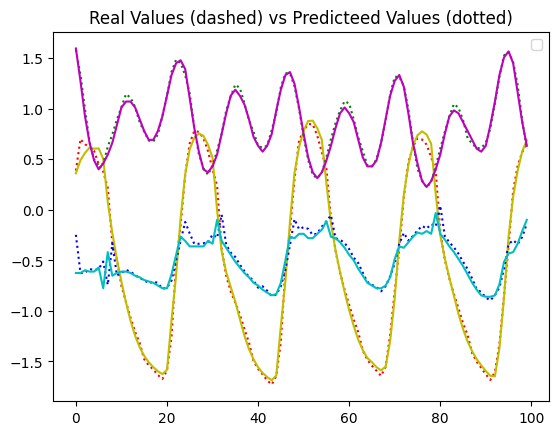

,tcap,tact,pcap,pact,hcap,hact
0,0.387994,0.361039,1.581350,1.595592,-0.247635,-0.624696
1,0.698960,0.489860,1.337094,1.274898,-0.626073,-0.624696
2,0.647240,0.562435,0.995140,0.925051,-0.622792,-0.597530
3,0.626280,0.615052,0.671424,0.662666,-0.583995,-0.611113
4,0.580810,0.604166,0.498665,0.487742,-0.598457,-0.611113
...,...,...,...,...,...,...
95,-0.354073,-0.263106,1.558938,1.566438,-0.339685,-0.432271
96,0.188786,0.128799,1.462551,1.449822,-0.300497,-0.418688
97,0.437488,0.388255,1.232593,1.158283,-0.339769,-0.334926
98,0.570433,0.578764,0.879870,0.866743,-0.268076,-0.210415


In [40]:
plot_predictions(model, X_test, y_test)

In [41]:
model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


array([[ 0.38799366,  1.5813496 , -0.24763474],
       [ 0.69896036,  1.337094  , -0.6260735 ],
       [ 0.64724034,  0.99514   , -0.6227921 ],
       ...,
       [-0.23431376,  0.39151856,  0.16456178],
       [-0.31763187,  0.65083134,  0.00375309],
       [-0.49650136,  0.7199578 ,  0.0229918 ]], dtype=float32)

In [42]:
original_predictions = scaler.inverse_transform(model.predict(X_test))

32/32 [==============================] - 0s 2ms/step


In [43]:
original_predictions

array([[26.01856  , 94.40511  , 12.16559  ],
       [27.732466 , 94.321335 , 10.4939165],
       [27.447409 , 94.20404  , 10.508411 ],
       ...,
       [22.588692 , 93.996994 , 13.986382 ],
       [22.12948  , 94.08594  , 13.276043 ],
       [21.143635 , 94.10965  , 13.361026 ]], dtype=float32)

In [44]:
scaler.inverse_transform(y_test)

array([[25.87, 94.41, 10.5 ],
       [26.58, 94.3 , 10.5 ],
       [26.98, 94.18, 10.62],
       ...,
       [23.36, 94.02, 13.24],
       [22.37, 94.06, 13.37],
       [21.37, 94.1 , 13.24]])

In [45]:
scaler.inverse_transform([[-1, -1, -1]])
# this is how u do it

array([[18.36858522, 93.51969431,  8.84217473]])

In [46]:
import sqlite3
con = sqlite3.connect('mega.db')
cur = con.cursor()

cur.execute(
    """
    CREATE TABLE IF NOT EXISTS maharashtra_final(
        day INT,
        month INT,
        year INT,
        hour INT,
        temp REAL,
        pressure REAL,
        humidity REAL
    )
    """
)

In [47]:
x = -165
itr = temp_df.iloc[x:x+5].values
itr = itr.tolist()
# will be used for predictions!
# 2024 jan
itr

[[-0.9090244798045991, 0.691819574827292, 0.3147937811992729, 1.0, 0.0, 12.0],
 [-0.9743420345952067, 0.5752038245123985, 0.2446150045557957, 1.0, 1.0, 12.0],
 [-1.0142583180783562,
  0.5168959493549518,
  0.19028304844471663,
  1.0,
  2.0,
  12.0],
 [-1.0432883424297374,
  0.4877420117762077,
  0.13368726082900928,
  1.0,
  3.0,
  12.0],
 [-1.0723183667811187,
  0.6043577620911011,
  0.09293829374570006,
  1.0,
  4.0,
  12.0]]

In [48]:
def commit_values():
    
    con = sqlite3.connect('mega.db')
    cur = con.cursor()
    
    values = []
    window = itr.copy()
    day = window[0][3]
    hour = window[0][4]
    month = window[0][5]
    print(day, hour, month)
    for i in range(5):
        temp = []
        temp.append(window[i][0])
        temp.append(window[i][1])
        temp.append(window[i][2])
        values.append(scaler.inverse_transform([temp]))
        
    year = 2023    
    while (year<=2024):
        pred = model.predict(np.expand_dims(window, axis=0))[0]
        values.append((scaler.inverse_transform([pred])).ravel())
        window.append([pred[0], pred[1], pred[2], day, hour, month])
        window.pop(0)
        hour += 1
        if (hour>=24):
            hour = 0
            day += 1
            if (day==28):
                if (month==2):
                    day = 1
                    month = 3
                    continue
            if (day==32 and month%2==0):
                day = 1
                if (month==12):
                    month = 1
                    year += 1
                else:
                    month += 1
            if (day==31 and month%2!=0):
                day = 1
                month += 1
        # print(hour, pred)
        # print(window)
        cur.execute("""INSERT INTO maharashtra_final VALUES (?, ?, ?, ?, ?, ?, ?)""", (day, month, year, hour, float(values[-1][0]), float(values[-1][1]), float(values[-1][2])))
        con.commit()

In [49]:
commit_values()

1.0 0.0 12.0
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 12ms/step


In [50]:
sql_delete = """
    DELETE FROM maharashtra_final
    WHERE rowid IN (
        SELECT rowid
        FROM rajasthan_final
        LIMIT 743
    )
"""

cur.execute(sql_delete)
con.commit()
con.close()